## Chi-Squared Analysis

### First Question: Did more woman and children survive compared to man

Dataset from Canvas (Titanic passenger list.csv)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_titanic = pd.read_csv("../data/Titanic_Passengers.csv")
df_titanic

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75
...,...,...,...,...,...,...,...,...,...
1347,"FLETCHER, Miss N.",NaN,NaN,NaN,Female,1,died,£1 10s,1.50
1348,"STEVENS, Mr George",NaN,NaN,NaN,Male,1,died,£1 10s,1.50
1349,"CARRUTHERS, Mr Francis",NaN,NaN,NaN,Male,1,died,NaN,NaN
1350,"COLLIS, Mr",NaN,NaN,NaN,Male,1,died,NaN,NaN


- What kind of data the the `dependent` variable?

- What kind of data is the `gender` (indep. variable)?
    - Nominal

Two types
- `Ordinal` data. Data that can be ordered.
- `Categorical/nominal`. Data that can not be ordered.

In [3]:
contingency_table = pd.crosstab(df_titanic['Gender'], df_titanic['Lived_Died'], margins=True)
contingency_table

Lived_Died,died,lived,All
Gender,,,
Female,143,339,482
Male,709,161,870
All,852,500,1352


<Axes: title={'center': 'Number of passengers that lived or died by gender'}, xlabel='Gender', ylabel='Count'>

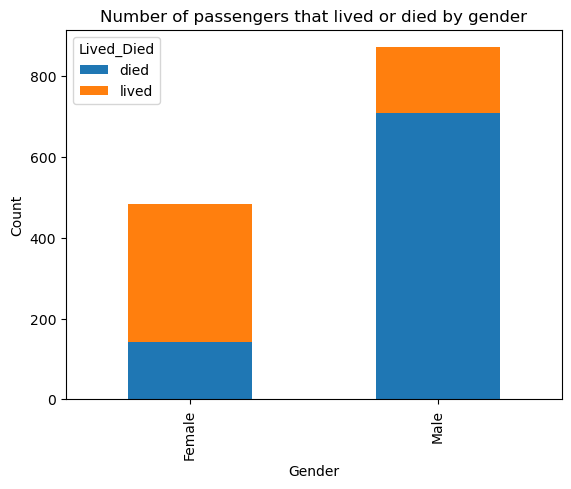

In [4]:
# Task: Create a stacked bar chart showing the number of passengers by gender that lived or died

# Exclude the last column and row (summary info)
contingency_table = contingency_table.iloc[:-1, :-1]
contingency_table.plot(kind='bar', stacked=True, title='Number of passengers that lived or died by gender', ylabel='Count')

In [5]:
# Alternative way to get the data
df_titanic.groupby('Gender')['Lived_Died'].value_counts()

Gender  Lived_Died
Female  lived         339
        died          143
Male    died          709
        lived         161
Name: count, dtype: int64

In [6]:
from scipy import stats # For chi2
print(stats.chi2_contingency(contingency_table)[0:3])

# you get 3 values back:
# 1) Chi-Squared: The higher the Chi-Squared statistics, the less likelihood that the observed values were the result of pure chance
# 2) Target P-Value
# 3) Degrees of freedom: 1 degree of freedom. (2 rows -1) * (2 columns - 1) = 1

# --> Gives us more confidence that not by chance more males than females died but instead that there is a relationship

(355.24355436145913, 3.0570688722545846e-79, 1)


## Chi-Square Example: Was Age relevant?

In [7]:
# Check the age column. It is already fixed for the age at the time of the incident

# What about null values?

# Create the bins
df_titanic['Age_Bin'] = pd.cut(df_titanic['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])
contingency_table = pd.crosstab(df_titanic['Age_Bin'], df_titanic['Lived_Died'])
print(contingency_table)
print(f'Chi2-Stats {stats.chi2_contingency(contingency_table)[0:3]}')

Lived_Died  died  lived
Age_Bin                
0-10          46     54
11-20        156     71
21-30        286    166
31-40        158    107
41-50        111     64
51-60         40     30
61-70         27      7
71-80          5      0
Chi2-Stats (24.465546982751874, 0.0009433264132943263, 7)


<Axes: title={'center': 'Number of passengers that lived or died by age group'}, xlabel='Age group', ylabel='Count'>

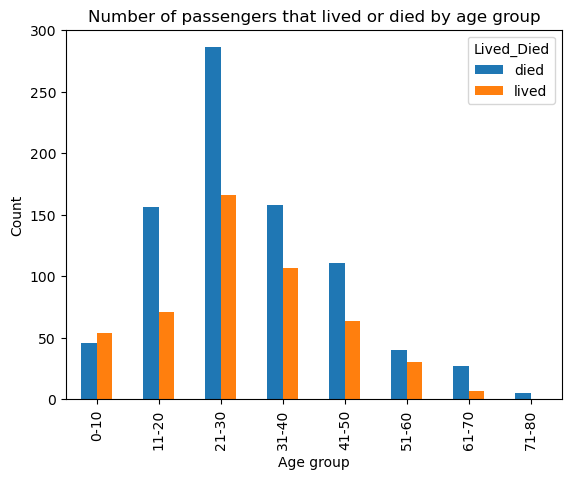

In [8]:
# Create a histogram

contingency_table.plot(kind='bar', stacked=False, title='Number of passengers that lived or died by age group', ylabel='Count', xlabel='Age group')

Text(50.722222222222214, 0.5, 'Gender')

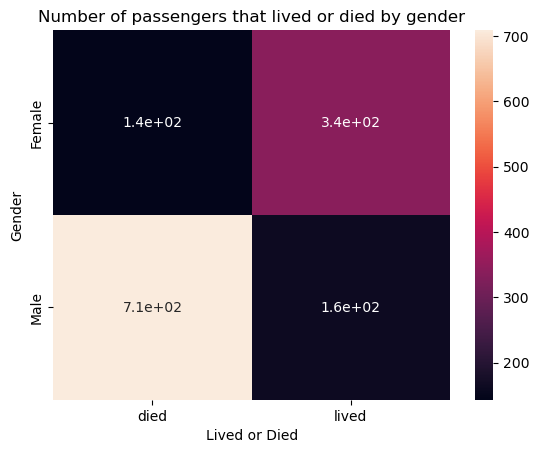

In [9]:
# Use a pivot table
pivot_table = df_titanic.pivot_table(index='Gender', columns='Lived_Died', aggfunc='size')

sns.heatmap(pivot_table, annot=True)
plt.title('Number of passengers that lived or died by gender')
plt.xlabel('Lived or Died')
plt.ylabel('Gender')

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

# Load data
df_titanic = pd.read_csv("../data/Titanic_Passengers.csv")

df_titanic.columns

Index(['Name', 'Born', 'Died', 'Age', 'Gender', 'Passenger_Class',
       'Lived_Died', 'Fare', 'Fare_decimal'],
      dtype='object')

C:\Users\carst\AppData\Local\Temp\ipykernel_11448\1909077498.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df_titanic, values='Lived_Died_int', index='Gender', columns='Age_Groups')  # Use pivottable
C:\Users\carst\AppData\Local\Temp\ipykernel_11448\1909077498.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table.applymap(lambda x: 1-x) # Invert values in heatmap


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, '0-9'),
  Text(1.5, 0, '10-19'),
  Text(2.5, 0, '20-29'),
  Text(3.5, 0, '30-39'),
  Text(4.5, 0, '40-49'),
  Text(5.5, 0, '50-59'),
  Text(6.5, 0, '60-69'),
  Text(7.5, 0, '70-79')])

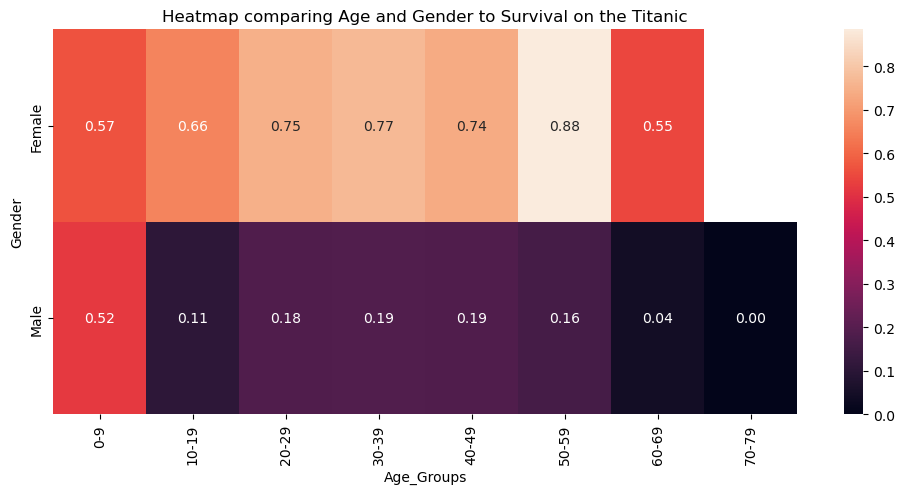

In [18]:
# Drop columns you dont need
df_titanic.drop(['Name', 'Born', 'Died', 'Fare', 'Fare_decimal', 'Passenger_Class'], axis=1, inplace=True)
df_titanic.dropna(inplace=True) # drop null values

# Encode the categorical data
le = preprocessing.LabelEncoder()
df_titanic['Lived_Died_int'] = le.fit_transform(df_titanic['Lived_Died'])
df_titanic['Age_Groups'] = pd.cut(df_titanic['Age'], bins=range(0, 90, 10)) # Create bins

pivot_table = pd.pivot_table(df_titanic, values='Lived_Died_int', index='Gender', columns='Age_Groups')  # Use pivottable
pivot_table.applymap(lambda x: 1-x) # Invert values in heatmap

# Create a heatmap
plt.figure(figsize=(12, 5))
x_axis_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
sns.heatmap(pivot_table, annot=True, yticklabels=['Female', 'Male'], xticklabels=x_axis_labels, fmt='.2f', cmap='rocket')
plt.title('Heatmap comparing Age and Gender to Survival on the Titanic')
plt.xticks(rotation=90)

## Task: Did the Titanic Passenger Class Affected Survivorship?

In this case, the data is `ordinal` because we can order the categories from first to third

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

# Load data
df_titanic = pd.read_csv("../data/Titanic_Passengers.csv")
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1352 non-null   object 
 1   Born             1328 non-null   float64
 2   Died             1309 non-null   float64
 3   Age              1328 non-null   float64
 4   Gender           1352 non-null   object 
 5   Passenger_Class  1352 non-null   int64  
 6   Lived_Died       1352 non-null   object 
 7   Fare             1321 non-null   object 
 8   Fare_decimal     1321 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 95.2+ KB


In [32]:
# Create a contingency table
contingency_table = pd.crosstab(index=df_titanic['Lived_Died'], columns=df_titanic['Passenger_Class'])
contingency_table

Passenger_Class,1,2,3
Lived_Died,,,
died,149,175,528
lived,201,118,181


<Axes: xlabel='Lived_Died'>

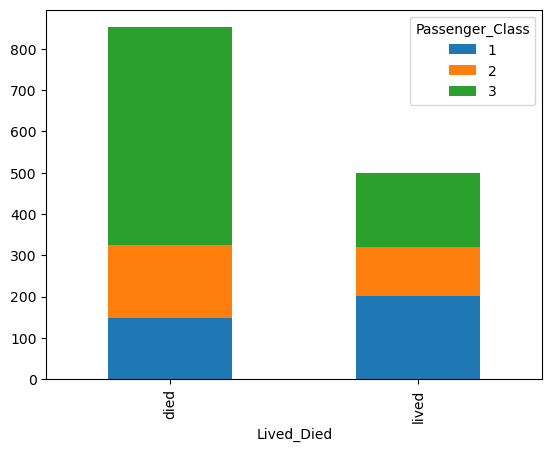

In [33]:
# Create a Bar plot with the data stacked
contingency_table.plot(kind='bar', stacked=True)

In [34]:
# Run a chi2_contingency on the table
contingency_table = pd.crosstab(index=df_titanic['Passenger_Class'], columns=df_titanic['Lived_Died'])
stats.chi2_contingency(contingency_table)[0:3]

(104.05195288933228, 2.543346399916496e-23, 2)

Which passenger class is responsible for the significant difference in survival rate?
- Chi-square test offers that at least `one` of the passenger class is different from what we would expect  if the variables were independent
- Since this is our test, it is considered a `Priori Test`
- To continue our analysis, we will run another test, a `Post Hoc` test

### Post-Hoc Test (Fisher's Exact Test)
- Compare every passenger class to every other class to see if there is statistical significance between the two.
- We could apply a `Chi-square` test for each of the three separate comparison, but our sample data is too small.
- In this case, `Fisher's Exact` test is a better option

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

# Load data
df_titanic = pd.read_csv("../data/Titanic_Passengers.csv")

In [37]:
contingency_table = pd.crosstab(index=df_titanic['Passenger_Class'], columns=df_titanic['Lived_Died'])
contingency_table

Lived_Died,died,lived
Passenger_Class,,
1,149,201
2,175,118
3,528,181


In [39]:
first_class = contingency_table.iloc[0].values  # Extract row values
second_class = contingency_table.iloc[1].values  # Extract row values
third_class = contingency_table.iloc[2].values  # Extract row values

# Create a Fisher's Extract test to determine if there is a relationship between passenger classes and survival
oddsratio, pvalue = stats.fisher_exact([first_class, second_class])
print(f'Fishers Exact Test for First and Second Class: {pvalue}')

oddsratio, pvalue = stats.fisher_exact([first_class, third_class])
print(f'Fishers Exact Test for First and Third Class: {pvalue}')

oddsratio, pvalue = stats.fisher_exact([second_class, third_class])
print(f'Fishers Exact Test for Second and Third Class: {pvalue}')

Fishers Exact Test for First and Second Class: 1.827149276703859e-05
Fishers Exact Test for First and Third Class: 7.457205699022123e-24
Fishers Exact Test for Second and Third Class: 5.007621820657881e-06


Each of the Fisher's Test reveals statistical significance

Another way to conceptualize the result is to look at percentages:

| Passenger Class   |   Died    |
|-------------------|-----------|
| First Class       | 43%       |
| Second Class      | 60%       |
| Third Class       | 74%       |

In [ ]:
# Now plot a heatmap with the passenger classes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

# Load data
df_titanic = pd.read_csv("../data/Titanic_Passengers.csv")

df_titanic.columns

C:\Users\carst\AppData\Local\Temp\ipykernel_11448\2388514089.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df_titanic, values='Lived_Died_int', index='Gender', columns=['Age_Groups', 'Passenger_Class'])  # Use pivottable
C:\Users\carst\AppData\Local\Temp\ipykernel_11448\2388514089.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table.applymap(lambda x: 1-x) # Invert values in heatmap


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0.5, 0, 'PC1 0-9'),
  Text(1.5, 0, 'PC1 10-19'),
  Text(2.5, 0, 'PC1 20-29'),
  Text(3.5, 0, 'PC1 30-39'),
  Text(4.5, 0, 'PC1 40-49'),
  Text(5.5, 0, 'PC1 50-59'),
  Text(6.5, 0, 'PC1 60-69'),
  Text(7.5, 0, 'PC1 70-79'),
  Text(8.5, 0, 'PC2 0-9'),
  Text(9.5, 0, 'PC2 10-19'),
  Text(10.5, 0, 'PC2 20-29'),
  Text(11.5, 0, 'PC2 30-39'),
  Text(12.5, 0, 'PC2 40-49'),
  Text(13.5, 0, 'PC2 50-59'),
  Text(14.5, 0, 'PC2 60-69'),
  Text(15.5, 0, 'PC2 70-79'),
  Text(16.5, 0, 'PC3 0-9'),
  Text(17.5, 0, 'PC3 10-19'),
  Text(18.5, 0, 'PC3 20-29'),
  Text(19.5, 0, 'PC3 30-39'),
  Text(20.5, 0, 'PC3 40-49'),
  Text(21.5, 0, 'PC3 50-59'),
  Text(22.5, 0, 'PC3 60-69'),
  Text(23.5, 0, 'PC3 70-79')])

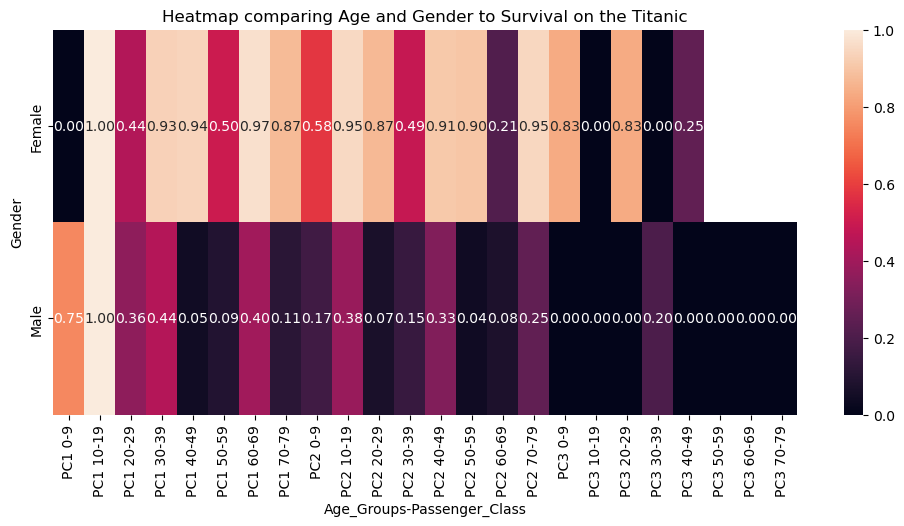

In [40]:
# Drop columns you dont need
df_titanic.drop(['Name', 'Born', 'Died', 'Fare', 'Fare_decimal'], axis=1, inplace=True)
df_titanic.dropna(inplace=True) # drop null values

# Encode the categorical data
le = preprocessing.LabelEncoder()
df_titanic['Lived_Died_int'] = le.fit_transform(df_titanic['Lived_Died'])
df_titanic['Age_Groups'] = pd.cut(df_titanic['Age'], bins=range(0, 90, 10)) # Create bins

pivot_table = pd.pivot_table(df_titanic, values='Lived_Died_int', index='Gender', columns=['Age_Groups', 'Passenger_Class'])  # Use pivottable
pivot_table.applymap(lambda x: 1-x) # Invert values in heatmap

# Create a heatmap
plt.figure(figsize=(12, 5))
x_axis_labels = ['PC1 0-9', 'PC1 10-19', 'PC1 20-29', 'PC1 30-39', 'PC1 40-49', 'PC1 50-59', 'PC1 60-69', 'PC1 70-79',
                 'PC2 0-9', 'PC2 10-19', 'PC2 20-29', 'PC2 30-39', 'PC2 40-49', 'PC2 50-59', 'PC2 60-69', 'PC2 70-79',
                 'PC3 0-9', 'PC3 10-19', 'PC3 20-29', 'PC3 30-39', 'PC3 40-49', 'PC3 50-59', 'PC3 60-69', 'PC3 70-79']
sns.heatmap(pivot_table, annot=True, yticklabels=['Female', 'Male'], xticklabels=x_axis_labels, fmt='.2f', cmap='rocket')
plt.title('Heatmap comparing Age and Gender to Survival on the Titanic')
plt.xticks(rotation=90)

### T-Test: Fare and Gender

While ``Chi-Test` and `Fisher-Test` focus on `categorical` discrete dependent variable, the `T-Test` and `ANOVA` test, target `continuous` data

#### How was Fare (price of passage) Affected by Gender and Passenger Class?
- Did one gender pay more than the other?
- Is there a difference in fare between passenger classes? 
- Is there an interaction between gender and passenger class on the resulting fare?

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from scipy import stats

# Load data
df_titanic = pd.read_csv("../data/Titanic_Passengers.csv")

Text(0.5, 1.0, 'Amount of Fare Paid Based on Gender')

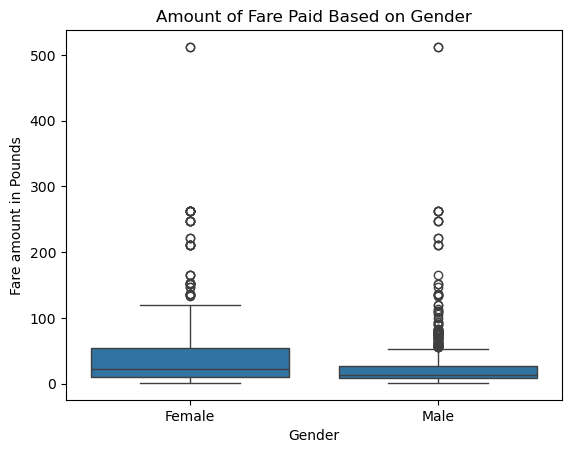

In [44]:
# Visualize data using boxplot
sns.boxplot(y=df_titanic['Fare_decimal'], x=df_titanic['Gender'])
plt.ylabel('Fare amount in Pounds')
plt.title('Amount of Fare Paid Based on Gender')


In [49]:
male = df_titanic[df_titanic['Gender'] == 'Male']
print(f'Male Summary {male['Fare_decimal'].describe()}')

Male Summary count    839.000000
mean      26.226067
std       42.514485
min        1.000000
25%        7.895000
50%       12.350000
75%       26.550000
max      512.330000
Name: Fare_decimal, dtype: float64


In [50]:
female = df_titanic[df_titanic['Gender'] == 'Female']
print(f'Female Summary {female['Fare_decimal'].describe()}')

Female Summary count    482.000000
mean      45.118299
std       63.149875
min        1.000000
25%       10.460000
50%       21.555000
75%       54.525000
max      512.330000
Name: Fare_decimal, dtype: float64


Null Hypothetis: There is no difference between the fare for males and females

In [52]:
from scipy.stats import ttest_ind
# Drop null values for the test to work
df_titanic.dropna(inplace=True)
male = df_titanic[df_titanic['Gender'] == 'Male']
female = df_titanic[df_titanic['Gender'] == 'Female']

# Run test
statistics, pvalue = ttest_ind(male['Fare_decimal'], female['Fare_decimal'])
print(f'T-Test for Fare Paid p-value {pvalue}')

T-Test for Fare Paid p-value 6.093364811911871e-13


## ANOVA Example: Price Difference Between Passenger Class
- `T-Test` specializes in comparing `two` populations
- `ANOVA (Analysis of Variance)` test will allow you to compare the influence of `three or more` populations

Fair Prices are `continuous numerical dependent variable`. They are affected by the three passenger classes.

Install new package:
```bash
conda install statsmodels
```

In [2]:
from statsmodels.formula.api import ols
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

# Load data
df_titanic = pd.read_csv("../data/Titanic_Passengers.csv")

In [3]:
# Load your OLS (Ordinary Least Square) model.
model = ols('Fare_decimal ~ C(Passenger_Class)', data=df_titanic).fit()
# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=1) # typ = # is the anova table format
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Passenger_Class),2.0,1.201111e+06,600555.522821,338.116478,2.964452e-119
Residual,1318.0,2.341004e+06,1776.179397,NaN,NaN


`PR(>F)` is your `P-value`

#### ANOVA Notation (R-style Formulas):
- The `~` char separates the left side from the right side
- The `+` char adds a new separator column to the design matrix
- The `:` char adds a new interaction column to the model matrix
- The `*` char signifies that both individual columns are combined

The string: `Fare_decimal ~ C(Passenger_class)` translates to:
- Fare decimal variable is affected by the categorical variable (`=C`) Passenger Class


Conclusion, there is some difference in price relative to the passenger class.

Text(0.5, 1.0, 'Amount of Fare Paid Based on Passenger Class')

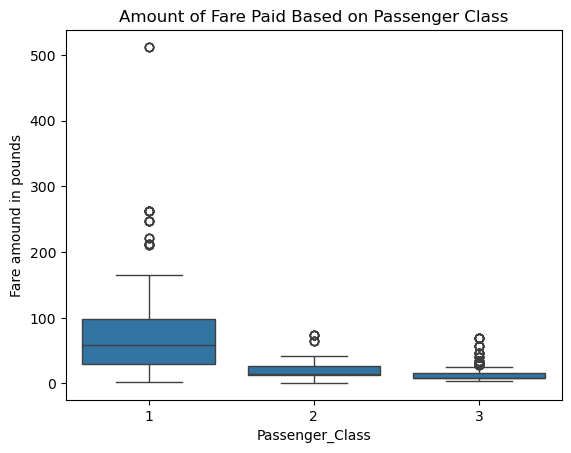

In [5]:
# Create a box plot of the fare paid by passenger class
sns.boxplot(y=df_titanic['Fare_decimal'], x=df_titanic['Passenger_Class'])
plt.ylabel('Fare amound in pounds')
plt.title('Amount of Fare Paid Based on Passenger Class')

Do a `post-hoc` test on this. For ANOVA we use the `Tukey HSD` test to compare each individual population from a statistically significant ANOVA.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

# Load data
df_titanic = pd.read_csv("../data/Titanic_Passengers.csv")

# Drop unused columns
df_titanic.drop(columns=['Born', 'Died', 'Fare', 'Lived_Died', 'Name', 'Gender'], inplace=True) # Drop unused columns
df_titanic.dropna(inplace=True) # Drop all NULLs

In [10]:
mc = MultiComparison(df_titanic['Fare_decimal'], df_titanic['Passenger_Class'])
result = mc.tukeyhsd()
result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-64.5942,0.0,-72.6865,-56.5018,True
1,3,-72.9052,0.0,-79.4909,-66.3195,True
2,3,-8.311,0.016,-15.3695,-1.2525,True


If no statistical significance is found, then the `reject` column will indicate `False`, that is, the `null-hypothesis` cannot be rejected.